# Benchmarks for Circuit Unoptimization in ZNE

In [1]:
from unopt.benchmark import bench
from unopt.circuit import generate_random_two_qubit_gate_circuit
from unopt.plots import plot_avg_circuit_depths
from unopt.noise import depolarizing_noise_model

from mitiq import zne

Running Trial 1/2...
Running Trial 2/2...
Averages Across All Trials:
  Ideal Value: 1.0
  Unmitigated Value: 0.7465999999999999
  ZNE + Fold Value: 0.8458999999999997 (Error: 0.15410000000000035)
  ZNE + Unopt Value: 0.8111706288373736 (Error: 0.18882937116262644)
  Percent Improvement (Unmit): 34.20%
  Percent Improvement (ZNE + Fold): -18.39%
  Original Circuit Depth: 57
  Avg Folded Depths: [57.0, 171.0, 285.0]
  Avg Unoptimized Depths: [57.0, 151.0, 184.5]


Trial Details:
Trial 1:
  Ideal Value: 1.0
  Unmitigated Value: 0.7487999999999999
  ZNE + Fold Value: 0.8455666666666664
  ZNE + Fold Depths: [57, 171, 285]
  ZNE + Unopt Value: 0.8043720309205901
  ZNE + Unopt Depths: [57, 150, 183]

Trial 2:
  Ideal Value: 1.0
  Unmitigated Value: 0.7444
  ZNE + Fold Value: 0.846233333333333
  ZNE + Fold Depths: [57, 171, 285]
  ZNE + Unopt Value: 0.8179692267541571
  ZNE + Unopt Depths: [57, 152, 186]



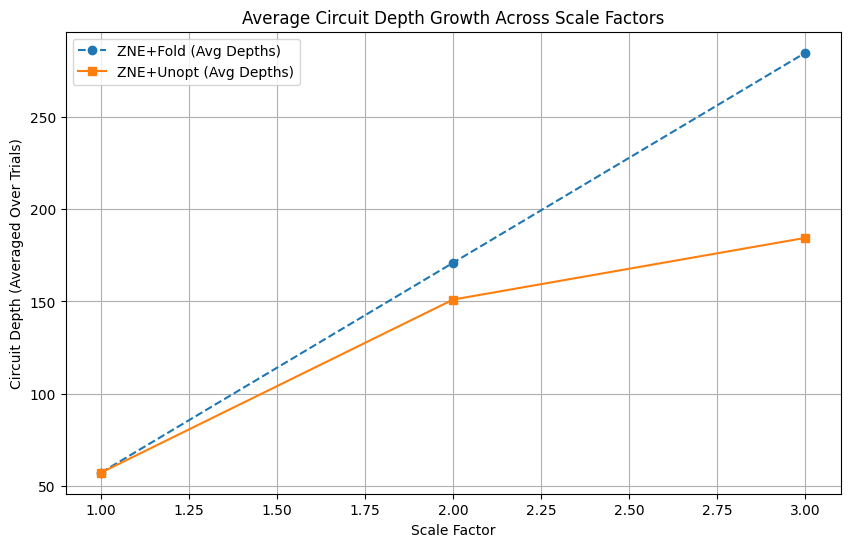

In [2]:
results = bench(
    qc=generate_random_two_qubit_gate_circuit(num_qubits=5, depth=35),
    scale_factors_zne=[1, 3, 5],
    iterations_unopt=[0, 1, 2],
    extrapolation_method=zne.LinearFactory,
    noise_model=depolarizing_noise_model(error=0.004),
    trials=2,
    verbose=True,
)
print(results)
plot_avg_circuit_depths(results)

In [34]:
from unopt.benchmark import bench
from unopt.circuit import generate_random_two_qubit_gate_circuit
from unopt.plots import plot_avg_circuit_depths
from unopt.noise import depolarizing_noise_model
from unopt.recipe import insert, swap, decompose, synthesize
from qiskit import QuantumCircuit


from mitiq import zne

In [42]:
num_qubits = 4
# Initialize the circuit with the specified number of qubits
qc = QuantumCircuit(num_qubits)

# Apply Hadamard gates to all qubits
for qubit in range(num_qubits):
    qc.h(qubit)

# Apply controlled-Z (CZ) gates for every pair of qubits
for i in range(num_qubits):
    for j in range(i + 1, num_qubits):
        qc.cz(i, j)
# qc = generate_random_two_qubit_gate_circuit(num_qubits=3, depth=3)

In [48]:
qc.draw(output="mpl").savefig("circuit.svg")

In [49]:
# Step 1: Gate Insertion:
circuit, B1_info = insert(qc)
circuit.draw(output="mpl").savefig("circuit_insert.svg")

In [50]:
# Step 2: Gate Swapping:
circuit = swap(circuit, B1_info)
circuit.draw(output="mpl").savefig("circuit_swap.svg")

In [51]:
# Step 3: Decomposition:
circuit = decompose(circuit)
circuit.draw(output="mpl").savefig("circuit_decompose.svg")

In [52]:
# Step 4: Synthesis:
circuit = synthesize(circuit)
circuit.draw(output="mpl").savefig("circuit_synthesize.svg")